In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
stroke = pd.read_csv("Stroke_Prediction_Indians.csv")

In [3]:
stroke

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171995,171996,57,Female,0,0,0,Children,Rural,225.22,33.1,...,Vegetarian,1,1,4,0,No education,Middle,90,West,0
171996,171997,29,Female,0,0,1,Children,Rural,86.17,41.8,...,Vegetarian,0,1,7,0,Primary,Low,89,East,0
171997,171998,71,Female,0,1,0,Private,Urban,230.18,13.8,...,Vegetarian,0,0,4,0,Secondary,Middle,48,East,0
171998,171999,33,Female,1,1,0,Private,Urban,236.80,23.3,...,Non-Vegetarian,1,0,8,0,Primary,Low,91,North,1


In [4]:
stroke.describe()

,ID,Age,Hypertension,Heart Disease,Ever Married,Average Glucose Level,BMI,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Stroke Risk Score,Stroke Occurrence
count,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000
mean,86000.500000,54.009826,0.150134,0.100279,0.300965,184.931265,30.012799,0.200169,0.250000,7.500221,0.148948,50.619076,0.099395
std,49652.267488,21.076357,0.357203,0.300373,0.458679,66.314107,11.570356,0.400128,0.433014,2.875179,0.356038,28.906648,0.299193
min,1.000000,18.000000,0.000000,0.000000,0.000000,70.000000,10.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
25%,43000.750000,36.000000,0.000000,0.000000,0.000000,127.540000,20.000000,0.000000,0.000000,5.000000,0.000000,26.000000,0.000000
50%,86000.500000,54.000000,0.000000,0.000000,0.000000,184.760000,30.000000,0.000000,0.000000,7.000000,0.000000,51.000000,0.000000
75%,129000.250000,72.000000,0.000000,0.000000,1.000000,242.440000,40.100000,0.000000,0.250000,10.000000,0.000000,76.000000,0.000000
max,172000.000000,90.000000,1.000000,1.000000,1.000000,300.000000,50.000000,1.000000,1.000000,12.000000,1.000000,100.000000,1.000000


In [5]:
stroke.isnull().sum()

ID                          0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Education Level             0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64

In [6]:
categorical_columns = ["Gender","Work Type","Residence Type",
                      "Smoking Status","Physical Activity",
                      "Dietary Habits","Education Level",
                      "Income Level","Region"]

for col in categorical_columns:
    print(f"{col} : value ad frequency")
    print(stroke[col].value_counts())
    print("-"*30)

Gender : value ad frequency
Gender
Male      82626
Female    82497
Other      6877
Name: count, dtype: int64
------------------------------
Work Type : value ad frequency
Work Type
Private          86041
Self-employed    34413
Children         17271
Never Worked     17176
Government       17099
Name: count, dtype: int64
------------------------------
Residence Type : value ad frequency
Residence Type
Urban    86079
Rural    85921
Name: count, dtype: int64
------------------------------
Smoking Status : value ad frequency
Smoking Status
Never smoked       103438
Formerly smoked     34326
Smokes              17169
Unknown             17067
Name: count, dtype: int64
------------------------------
Physical Activity : value ad frequency
Physical Activity
Sedentary    68967
Light        51519
Moderate     34524
Active       16990
Name: count, dtype: int64
------------------------------
Dietary Habits : value ad frequency
Dietary Habits
Non-Vegetarian    86006
Vegetarian        51765
Mixed   

In [7]:
Stroke1= stroke.drop(columns=["ID","Gender","Stroke Occurrence"])

In [8]:
X = pd.DataFrame(Stroke1)

In [9]:
X

,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Physical Activity,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region
0,78,0,0,1,Private,Rural,267.30,36.2,Formerly smoked,Sedentary,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South
1,60,0,0,0,Private,Rural,207.24,19.8,Never smoked,Light,Vegetarian,0,0,9,0,Secondary,High,56,East
2,69,0,0,0,Private,Urban,161.30,34.5,Never smoked,Sedentary,Mixed,1,0,3,0,Secondary,High,63,North
3,43,0,0,1,Never Worked,Urban,247.49,48.8,Never smoked,Active,Mixed,0,1,4,0,Tertiary,Middle,93,South
4,30,0,0,1,Government,Urban,116.57,31.3,Formerly smoked,Light,Mixed,0,1,9,0,Secondary,High,99,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171995,57,0,0,0,Children,Rural,225.22,33.1,Never smoked,Sedentary,Vegetarian,1,1,4,0,No education,Middle,90,West
171996,29,0,0,1,Children,Rural,86.17,41.8,Never smoked,Moderate,Vegetarian,0,1,7,0,Primary,Low,89,East
171997,71,0,1,0,Private,Urban,230.18,13.8,Never smoked,Active,Vegetarian,0,0,4,0,Secondary,Middle,48,East
171998,33,1,1,0,Private,Urban,236.80,23.3,Never smoked,Sedentary,Non-Vegetarian,1,0,8,0,Primary,Low,91,North


In [10]:
label_encoder = LabelEncoder()

In [11]:
string_columns = ["Age","Hypertension","Heart Disease","Ever Married","Work Type","Residence Type","Average Glucose Level","BMI","Smoking Status","Physical Activity","Dietary Habits","Alcohol Consumption","Chronic Stress","Sleep Hours","Family History of Stroke","Education Level","Income Level","Stroke Risk Score","Region"]

In [12]:
for col in string_columns: 
    X[col] = label_encoder.fit_transform(X[col])

In [13]:
print("\nDataFrame after Label Encoding:")
print(X)


DataFrame after Label Encoding:
        Age  Hypertension  Heart Disease  Ever Married  Work Type  \
0        60             0              0             1          3   
1        42             0              0             0          3   
2        51             0              0             0          3   
3        25             0              0             1          2   
4        12             0              0             1          1   
...     ...           ...            ...           ...        ...   
171995   39             0              0             0          0   
171996   11             0              0             1          0   
171997   53             0              1             0          3   
171998   15             1              1             0          3   
171999   66             0              0             0          1   

        Residence Type  Average Glucose Level  BMI  Smoking Status  \
0                    0                  19714  262               0  

In [14]:
y = ( stroke.iloc[:,-1]).values

In [15]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [16]:
categorical_features = ["Gender", "Ever Married", "Work Type", "Residence Type", "Smoking Status"]

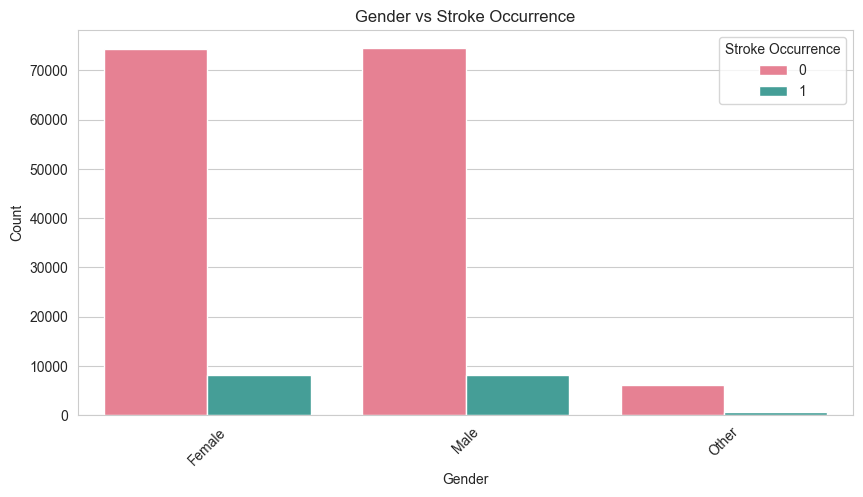

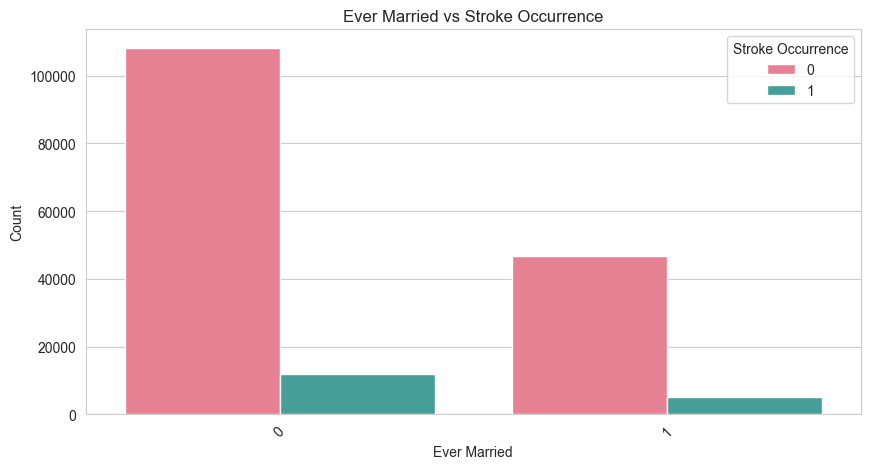

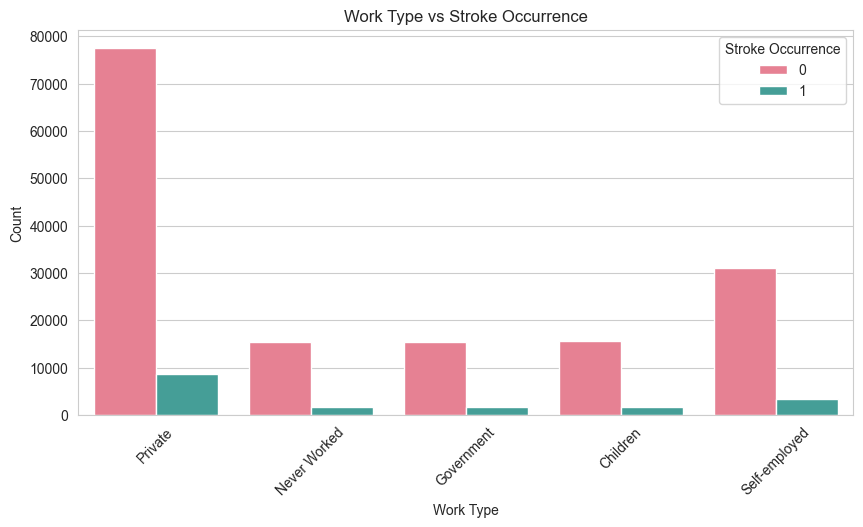

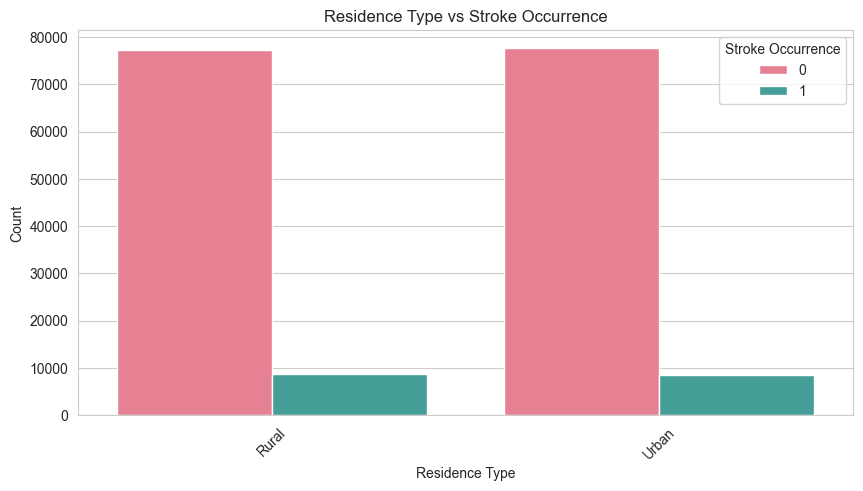

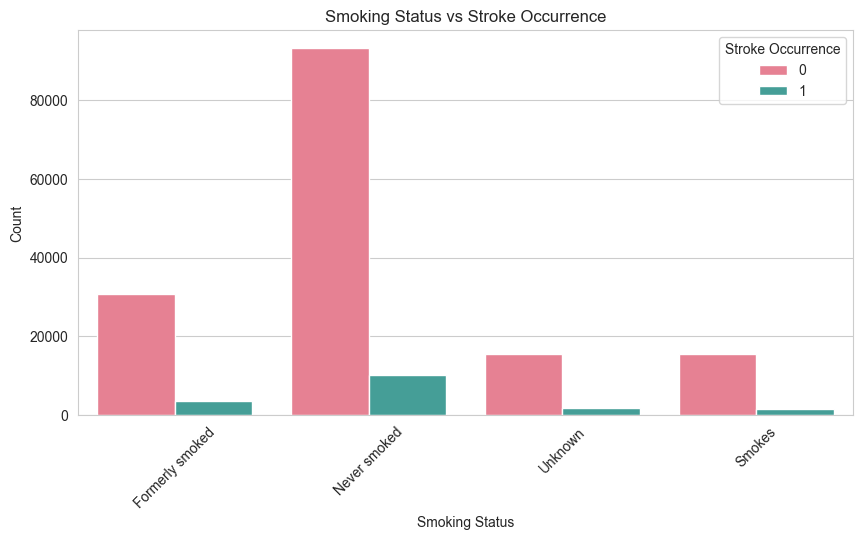

In [17]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue="Stroke Occurrence", data=stroke, palette="husl")
    plt.title(f"{feature} vs Stroke Occurrence")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
numerical_features = ["Age", "Average Glucose Level", "BMI", "Stroke Risk Score", "Sleep Hours"]

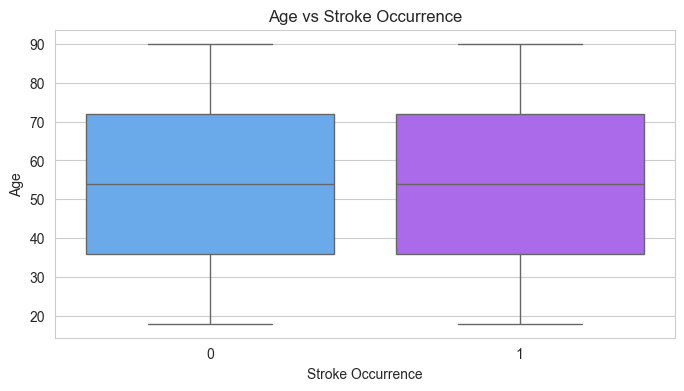

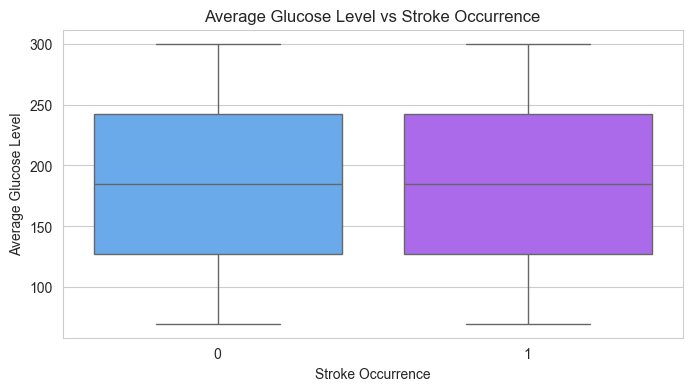

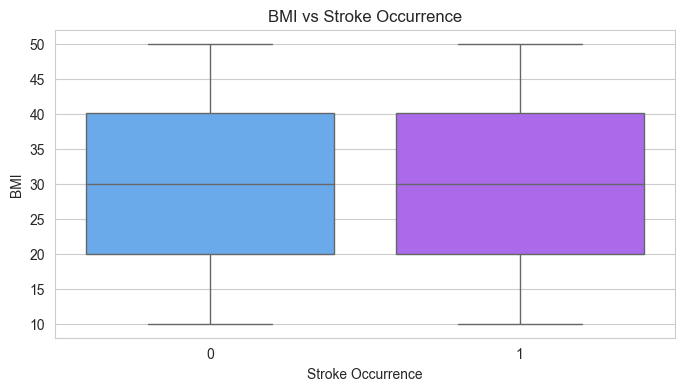

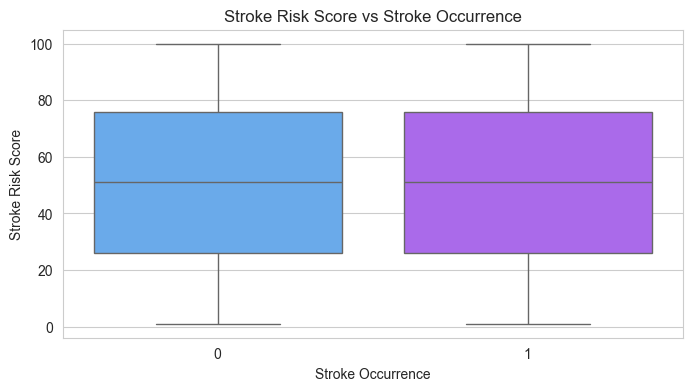

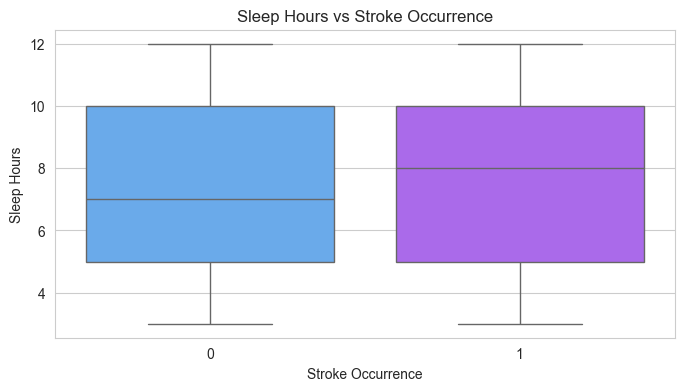

In [19]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Stroke Occurrence", y=feature, data=stroke, palette="cool")
    plt.title(f"{feature} vs Stroke Occurrence")
    plt.xlabel("Stroke Occurrence")
    plt.ylabel(feature)
    plt.show()

In [20]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in stroke.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(stroke, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(stroke)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

Number of Outliers: 163215
Outlier Ratio: 94.89%


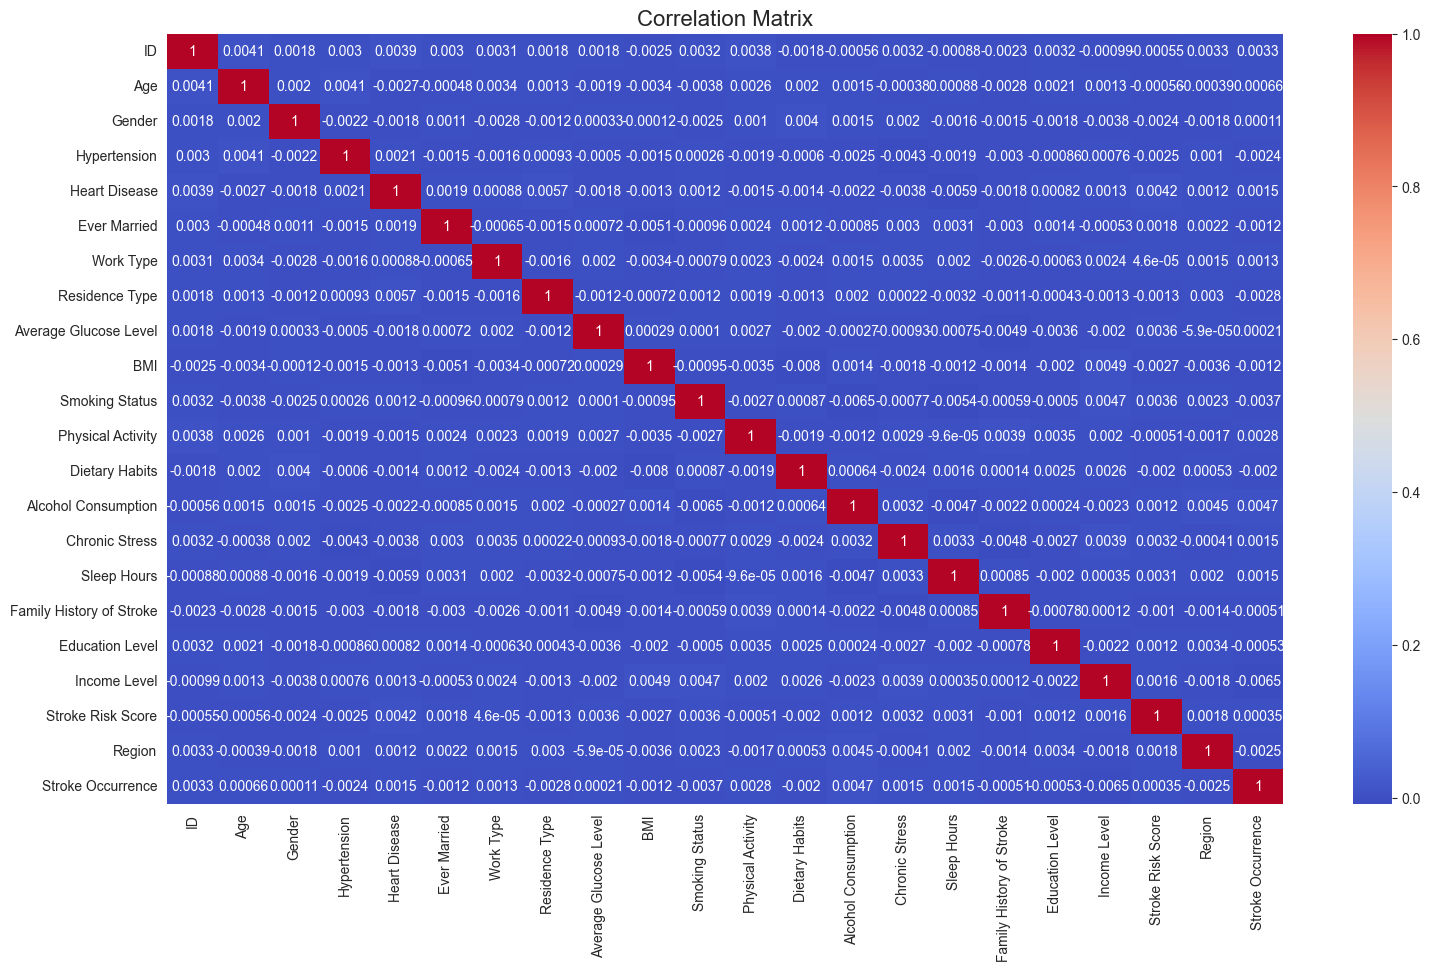

In [21]:
label_encoders = {}
for column in stroke.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    stroke[column] = label_encoders[column].fit_transform(stroke[column])

correlation_matrix = stroke.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
X_train.shape

(120400, 19)

In [25]:
X_test.shape

(51600, 19)

In [26]:
#Robust scaling transforms data based on the median and the interquartile range (IQR) 

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
prediction=LogisticRegression()

In [31]:
prediction.fit(X_train_scaled,y_train)

LogisticRegression()

In [33]:
y_pred = prediction.predict(X_test_scaled)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

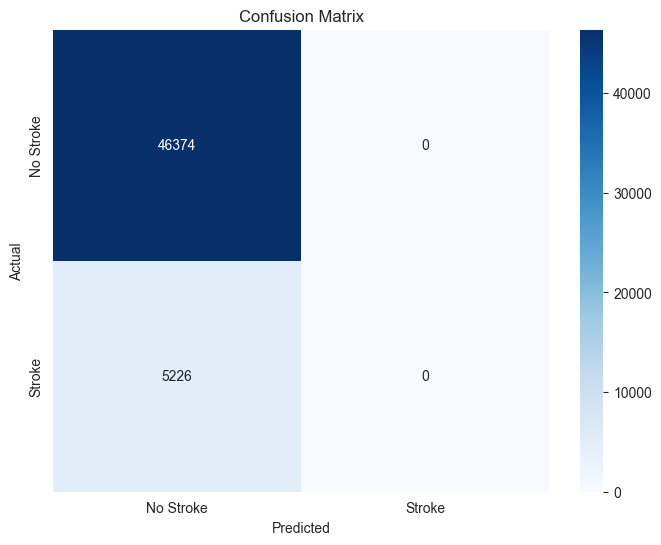

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred) # This function calculates the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
# annot if for count
#fmt="d": Ensures annotations are displayed as integers.
#46374 True Negatives (correctly predicted as No Stroke)
#0 False Positives (incorrectly predicted as Stroke)
#5226 False Negatives (incorrectly predicted as No Stroke)
#0 True Positives (correctly predicted as Stroke)

Class Distribution:
0    154904
1     17096
Name: count, dtype: int64

Class Distribution (Percentage):
0    90.060465
1     9.939535
Name: count, dtype: float64


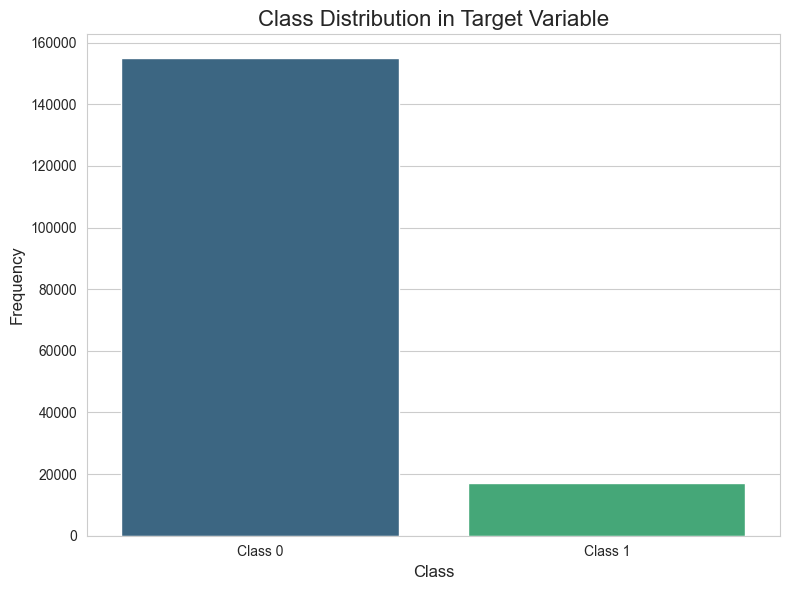

In [38]:
class_counts = pd.Series(y).value_counts()# to convert into pandas series and calculates the frequency of each class.
print("Class Distribution:")
print(class_counts)

class_percentage = class_counts / len(y) * 100
print("\nClass Distribution (Percentage):")
print(class_percentage)

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution in Target Variable", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Class 0", "Class 1"])
plt.tight_layout()
plt.show()
#class_counts / len(y) * 100: Computes the percentage of each class by dividing the class counts by the total number of instances and multiplying by 100
#Class Counts: Displays the exact number of instances for each target class.
#Class Percentages: Shows the percentage distribution of each class, providing a clearer picture of class balance or imbalance.
#Countplot Visualization: Provides a visual representation of the class distribution, making it easier to understand and interpret the data.


# clustering

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [51]:
y_kmeans = kmeans.fit_predict(X_scaled)

In [52]:
#Elbow Method

In [53]:
wcss = []
for i in range(1, 8): 
    kmeans = KMeans(n_clusters=i, random_state=42) # Initialize KMeans with i clusters 
    kmeans.fit(X) # Fit the model on the data 
    wcss_iter = kmeans.inertia_ # Get the WCSS (inertia) 
    wcss.append(wcss_iter) # Append the WCSS to the list

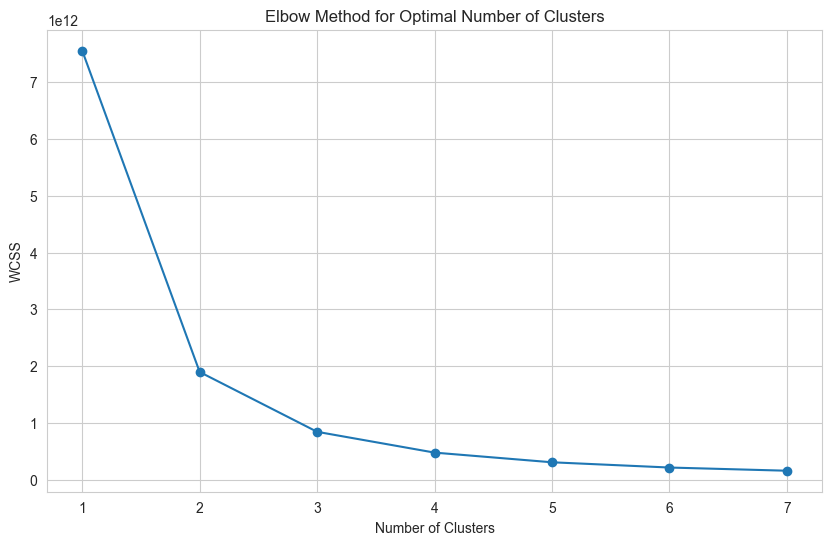

In [54]:
plt.figure(figsize=(10, 6)) 
plt.plot(range(1, 8), wcss, marker='o') 
plt.title('Elbow Method for Optimal Number of Clusters') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [57]:
CL = pd.DataFrame(X, columns=["Age","Hypertension","Heart Disease","Ever Married","Work Type","Residence Type","Average Glucose Level","BMI","Smoking Status","Physical Activity","Dietary Habits","Alcohol Consumption","Chronic Stress","Sleep Hours","Family History of Stroke","Education Level","Income Level","Stroke Risk Score","Region"])
CL['Cluster'] = y_kmeans
plt.figure(figsize=(10, 8)) 
sns.scatterplot(data=stroke, x="Age", y='Stroke', hue='Cluster', palette="viridis", s=100, alpha=0.7, edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Centroids')
plt.title('Clusters Visualization with K-means')
plt.legend()
plt.show()

ValueError: Could not interpret value `Feature 2` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>